In [28]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [29]:
from computations.insights.opinions import varying_parameters
from plotting.basic import *
from plotting.summaries import *
from matplotlib import pyplot as plt
from computations.probabilistic.vectorised import *
from society.structure import AgentCollection, AgentNetwork
from society.structure.network import ArtificialNetwork
from society.beliefs import Distribution, BeliefDistribution

In [30]:
uniform = Distribution(type="uniform", range=(0.05, 0.2))
linespace = Distribution(type="linespace", range=(-1,1))
belief_distribution = BeliefDistribution(uniform, uniform, linespace)
network = ArtificialNetwork(100, network_type="fully_connected")
update_rule = UpdateRule()
interactions = Interactions(update_rule, interaction_rate=0.7,information_source=(0.6, 0.4))
insights = Insights()
simulation = Simulation(1000, insights)

In [31]:
assimilation_biases = [1, 0.2, 0.01, 0]
def get_biases(update_rule, agent_group):
    interactions.update_rule = update_rule
    simulation_results = []
    for assimilation_bias in assimilation_biases:
        update_rule.assimilation_bias = assimilation_bias
        simulation.run(interactions, agent_group)
        result = copy.deepcopy(simulation.insights.belief_evolution)
        simulation_results.append(result)
    return simulation_results

Progress: 100%|██████████| 1000/1000 [00:06<00:00, 147.29it/s]


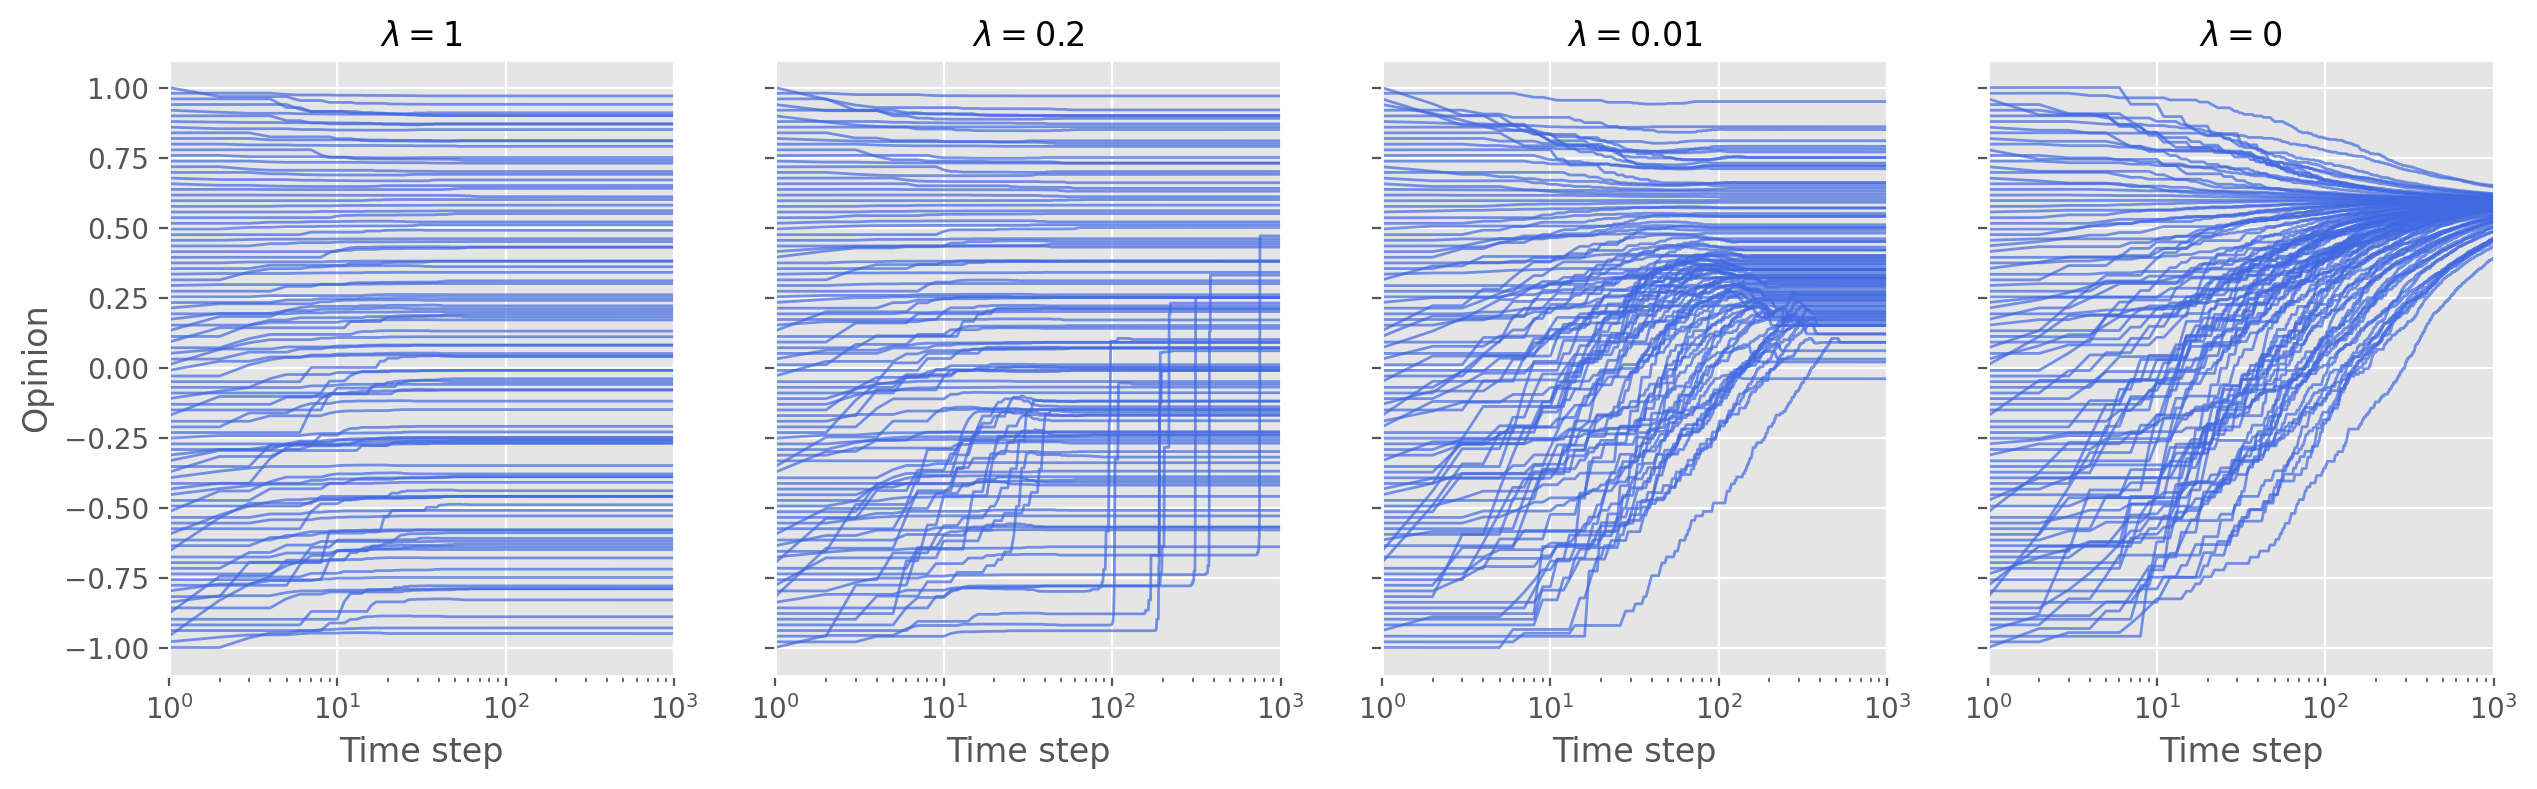

In [36]:
agent_group = AgentNetwork(belief_distribution, network, VectorisedAgent)
update_rule = UpdateRule(filter_likelihood=True)
plot_varying_assimilation(get_biases(update_rule, agent_group), assimilation_biases)

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 10405.95it/s]


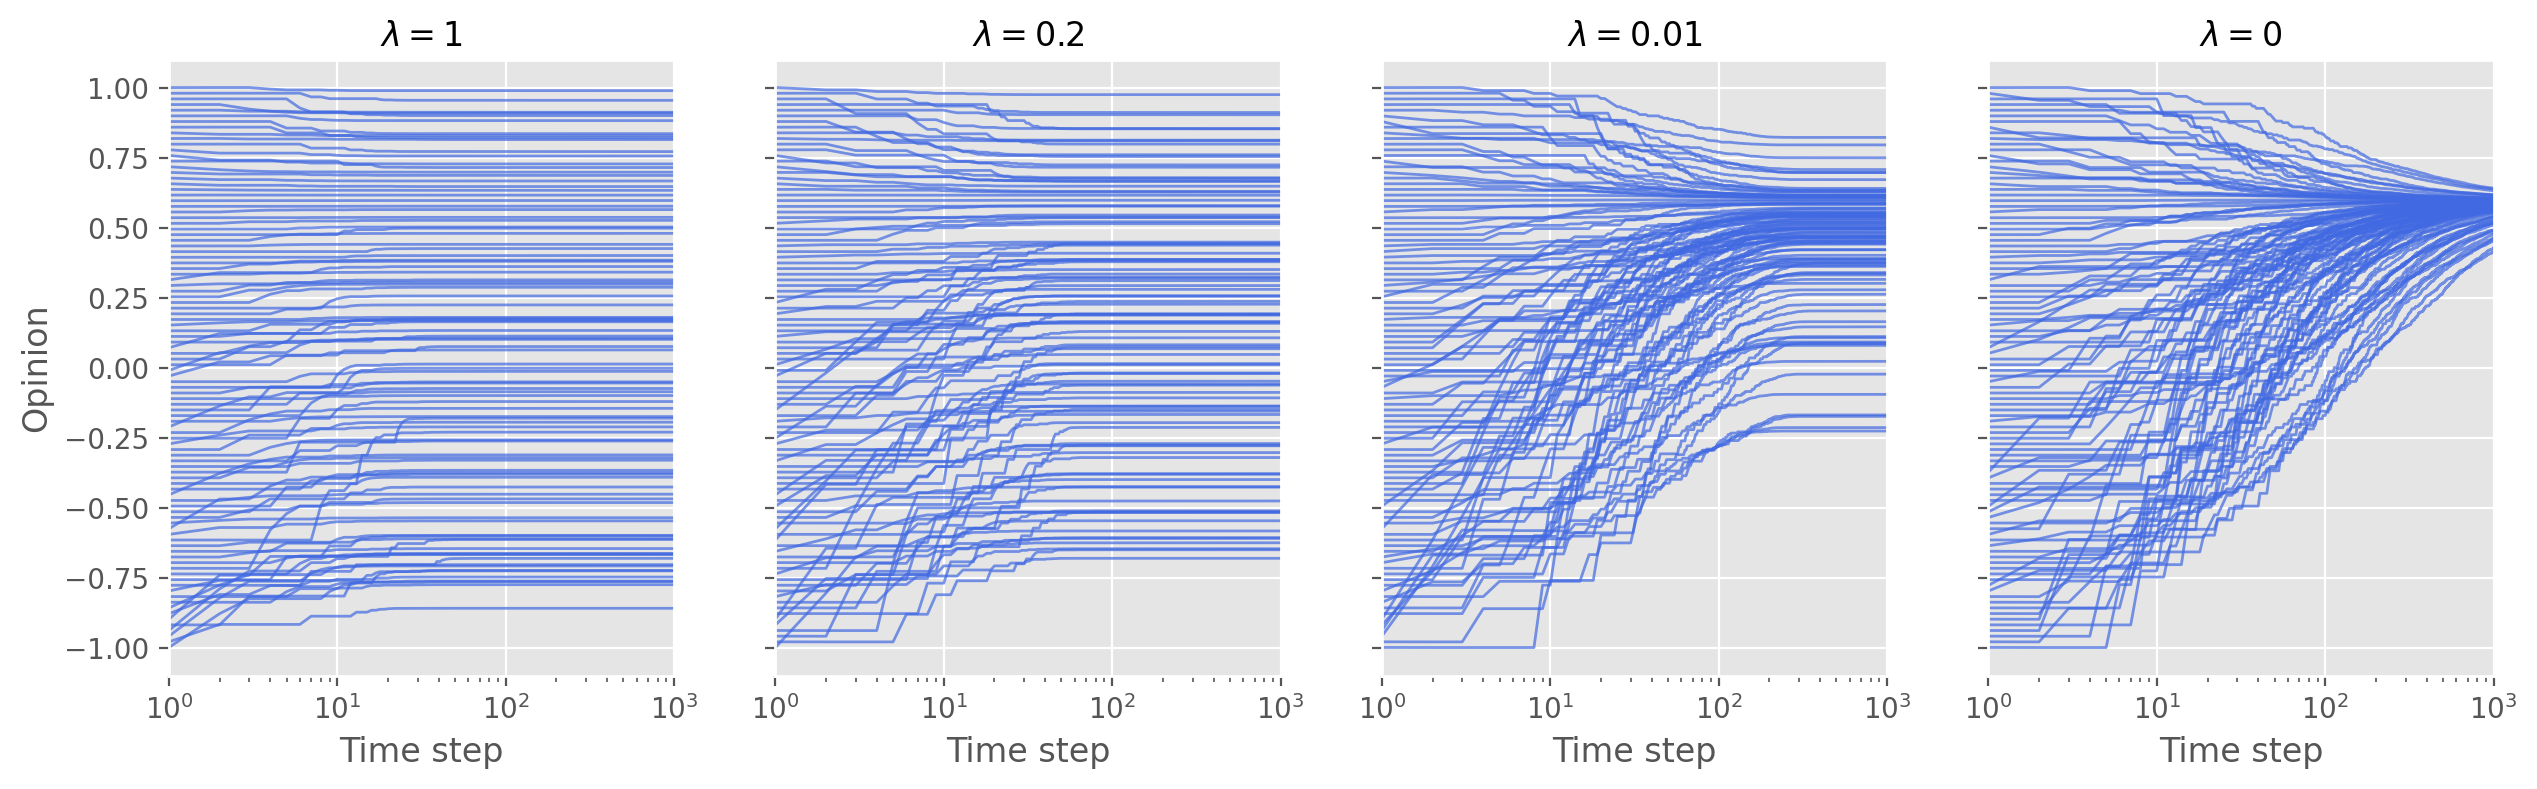

In [42]:
agent_group = AgentNetwork(belief_distribution, network, AnalyticalAgent)
update_rule = UpdateRule()
plot_varying_assimilation(get_biases(update_rule, agent_group), assimilation_biases)

Progress: 100%|██████████| 1000/1000 [00:00<00:00, 9623.08it/s]


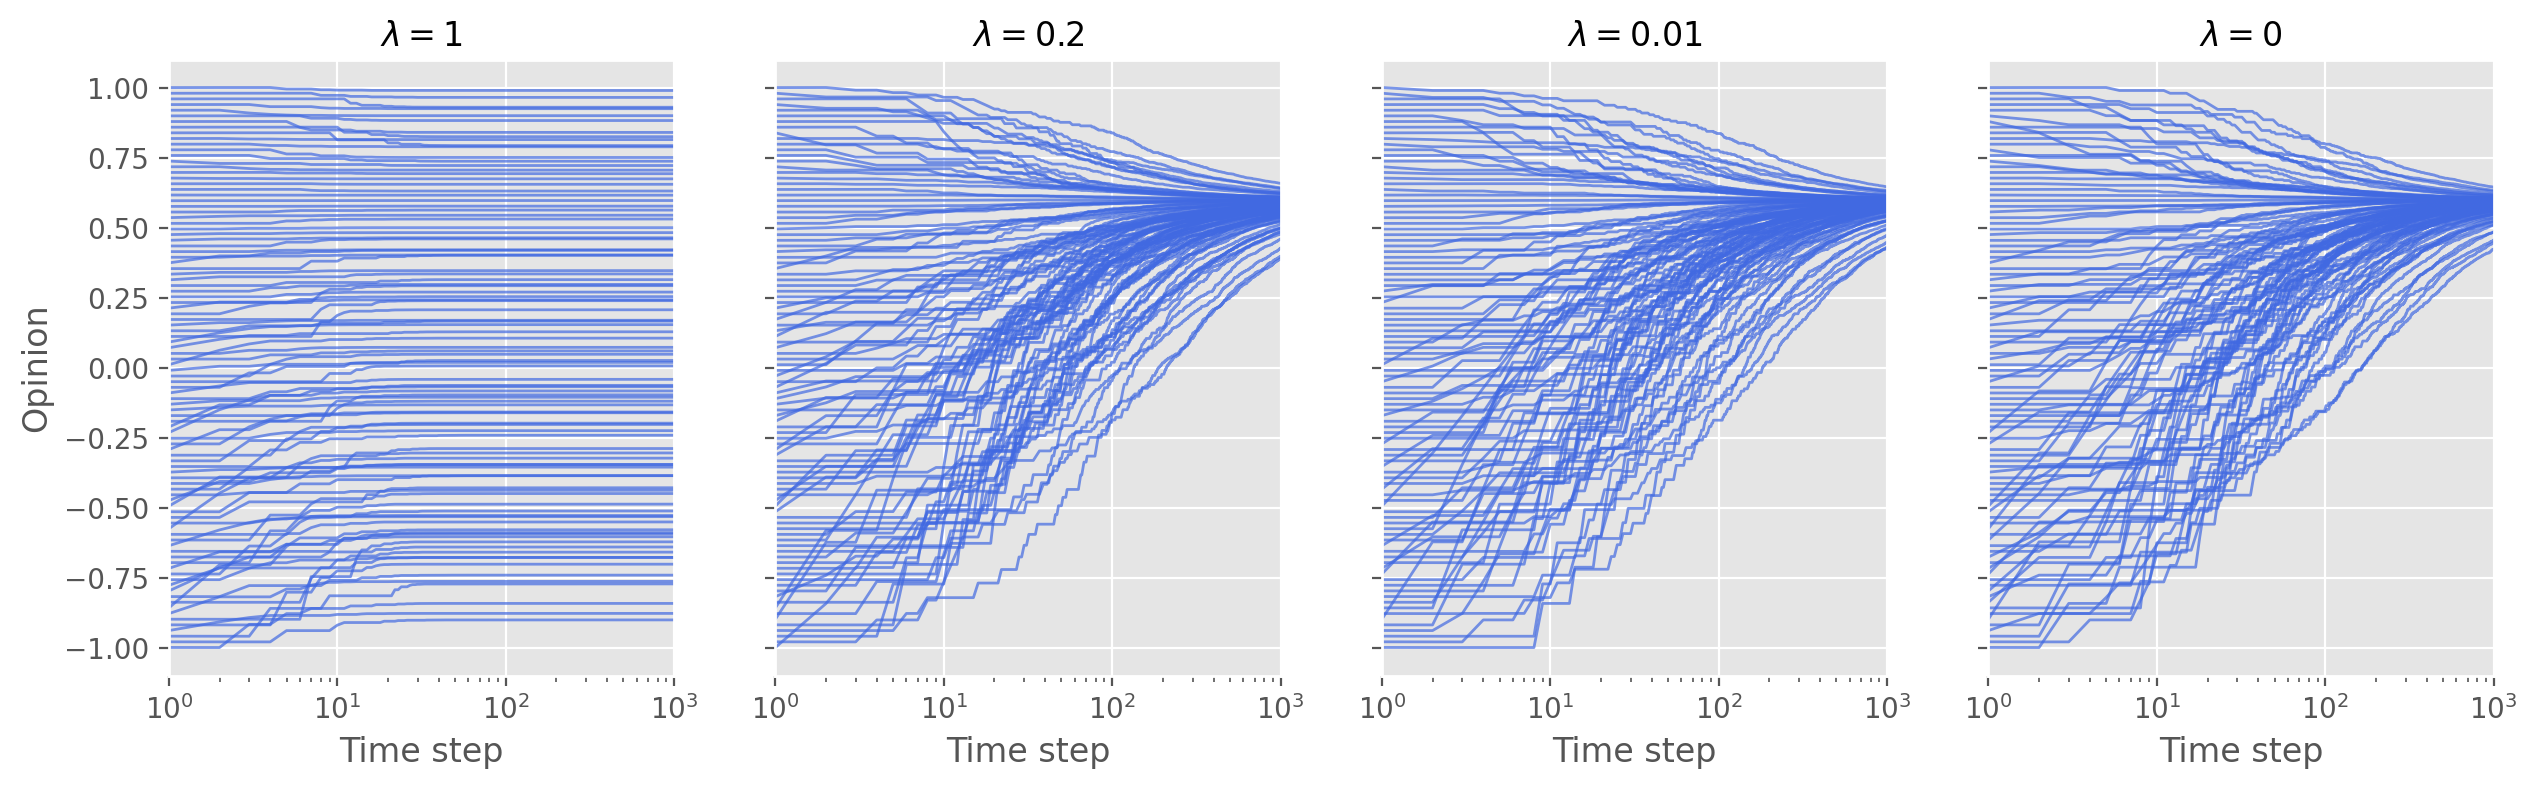

In [34]:
agent_group = AgentNetwork(belief_distribution, network, AnalyticalAgent)
update_rule = UpdateRule(filter_likelihood=True)
plot_varying_assimilation(get_biases(update_rule, agent_group), assimilation_biases)